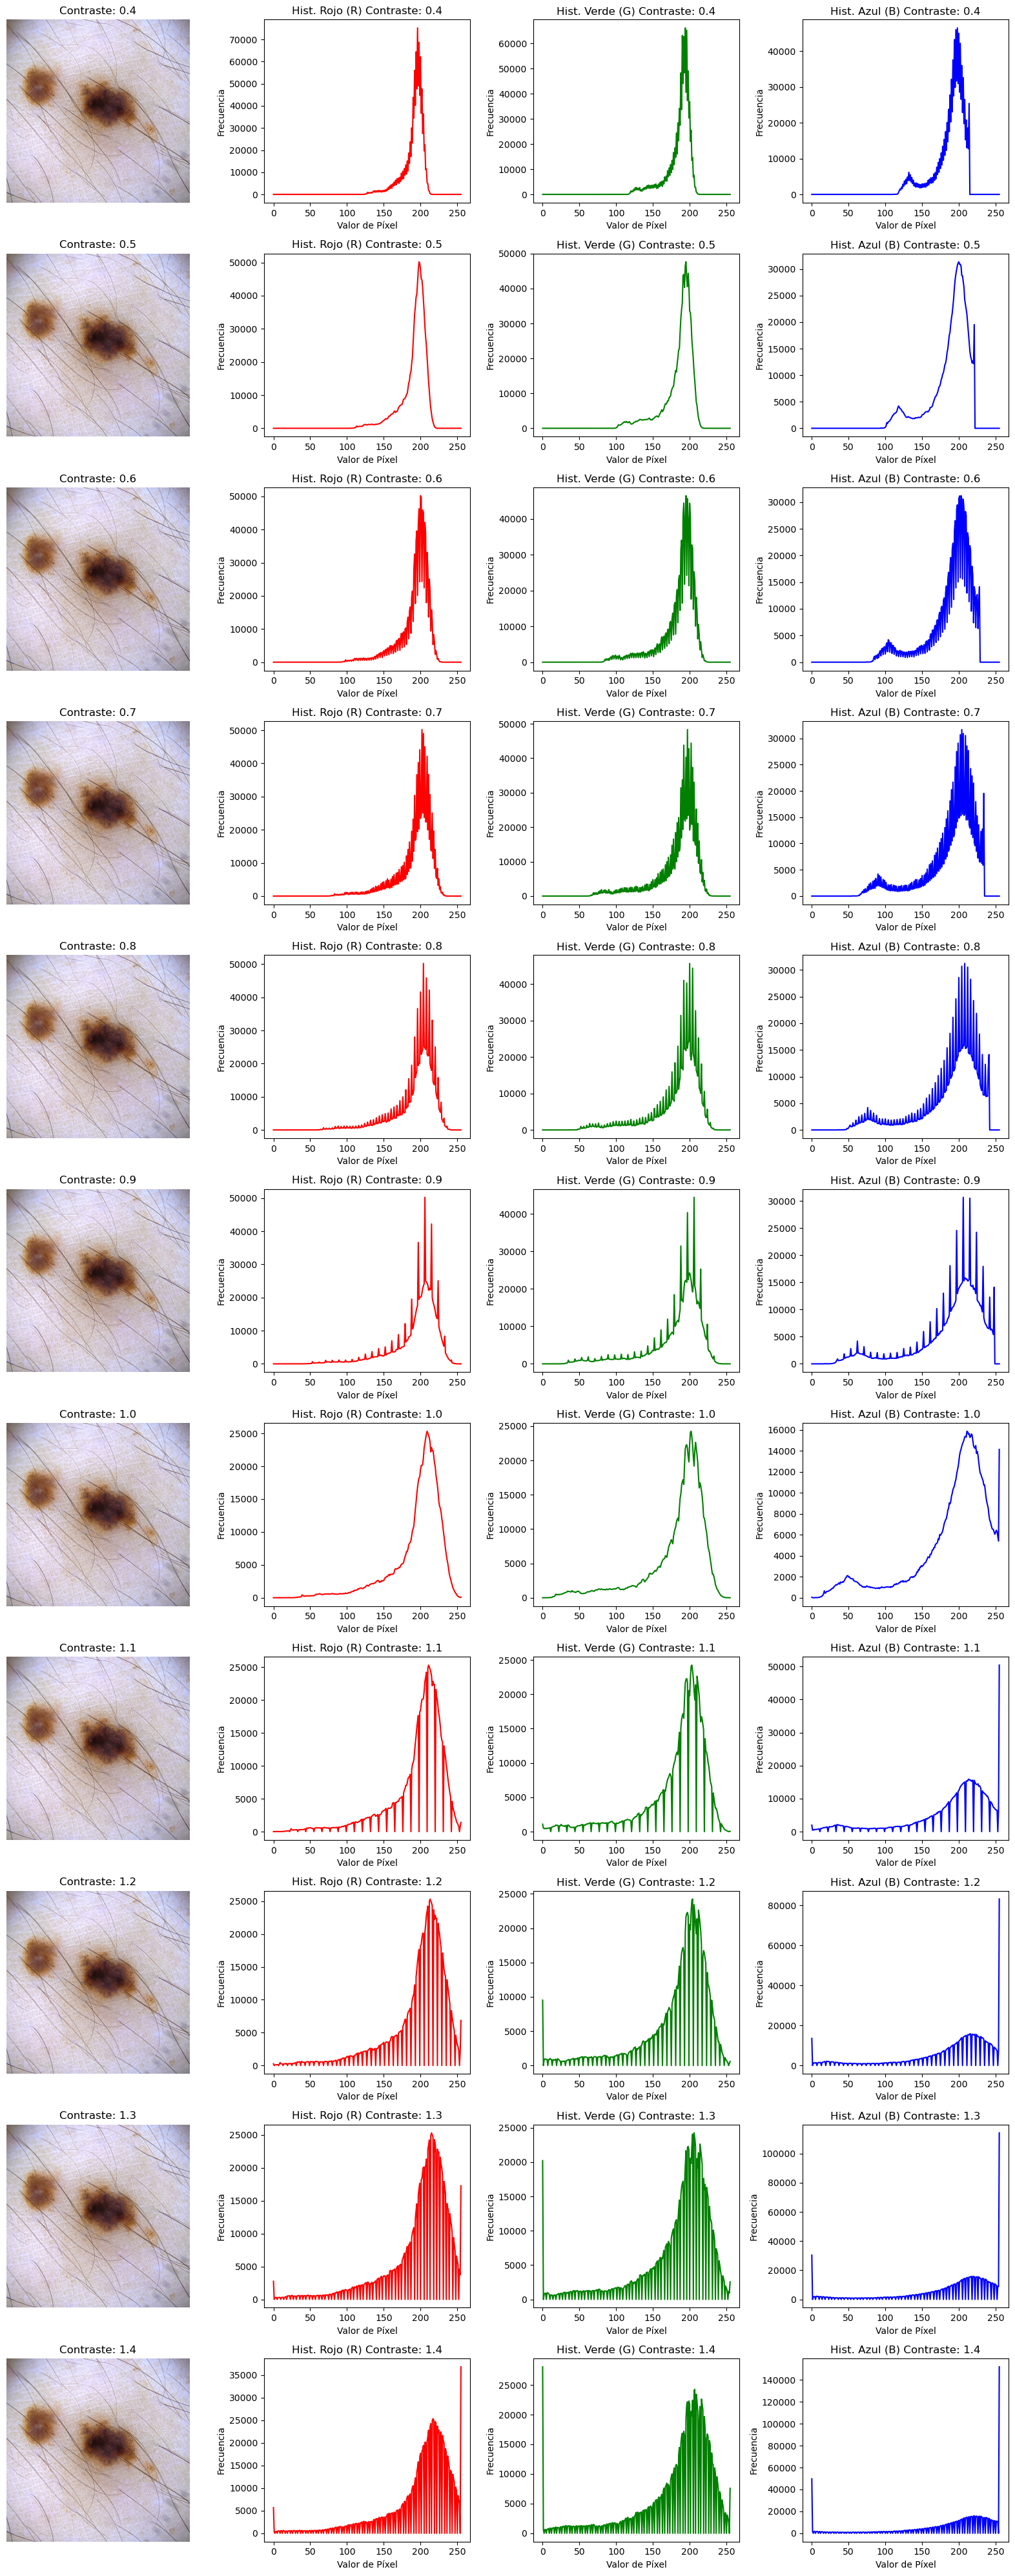

In [1]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Abrir una imagen
imagen_original = Image.open('imagen_ecualizada.jpg')

# Crear una figura con subtramas para mostrar las imágenes y los histogramas
num_filas = 11
num_columnas = 4
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(16, 40))

for i, factor_contraste in enumerate(range(4, 15)):
    # Ajustar el contraste (0.4 a 1.4 con un paso de 0.1)
    factor_contraste /= 10.0
    enhancer = ImageEnhance.Contrast(imagen_original)
    imagen_contrastada = enhancer.enhance(factor_contraste)

    # Calcular los histogramas RGB de la imagen contrastada
    hist_r_contrastada = imagen_contrastada.histogram()[0:256]
    hist_g_contrastada = imagen_contrastada.histogram()[256:512]
    hist_b_contrastada = imagen_contrastada.histogram()[512:768]

    # Mostrar la imagen original en la subtrama actual
    axs[i, 0].imshow(imagen_original)
    axs[i, 0].set_title(f'Contraste: {factor_contraste:.1f}')
    axs[i, 0].axis('off')

    # Mostrar el histograma del canal Rojo (R) para la imagen original en la subtrama actual
    axs[i, 1].plot(hist_r_contrastada, color='red')
    axs[i, 1].set_title(f'Hist. Rojo (R) Contraste: {factor_contraste:.1f}')
    axs[i, 1].set_xlabel('Valor de Píxel')
    axs[i, 1].set_ylabel('Frecuencia')

    # Mostrar el histograma del canal Verde (G) para la imagen original en la subtrama actual
    axs[i, 2].plot(hist_g_contrastada, color='green')
    axs[i, 2].set_title(f'Hist. Verde (G) Contraste: {factor_contraste:.1f}')
    axs[i, 2].set_xlabel('Valor de Píxel')
    axs[i, 2].set_ylabel('Frecuencia')

    # Mostrar el histograma del canal Azul (B) para la imagen original en la subtrama actual
    axs[i, 3].plot(hist_b_contrastada, color='blue')
    axs[i, 3].set_title(f'Hist. Azul (B) Contraste: {factor_contraste:.1f}')
    axs[i, 3].set_xlabel('Valor de Píxel')
    axs[i, 3].set_ylabel('Frecuencia')

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar la figura con las subtramas
plt.show()



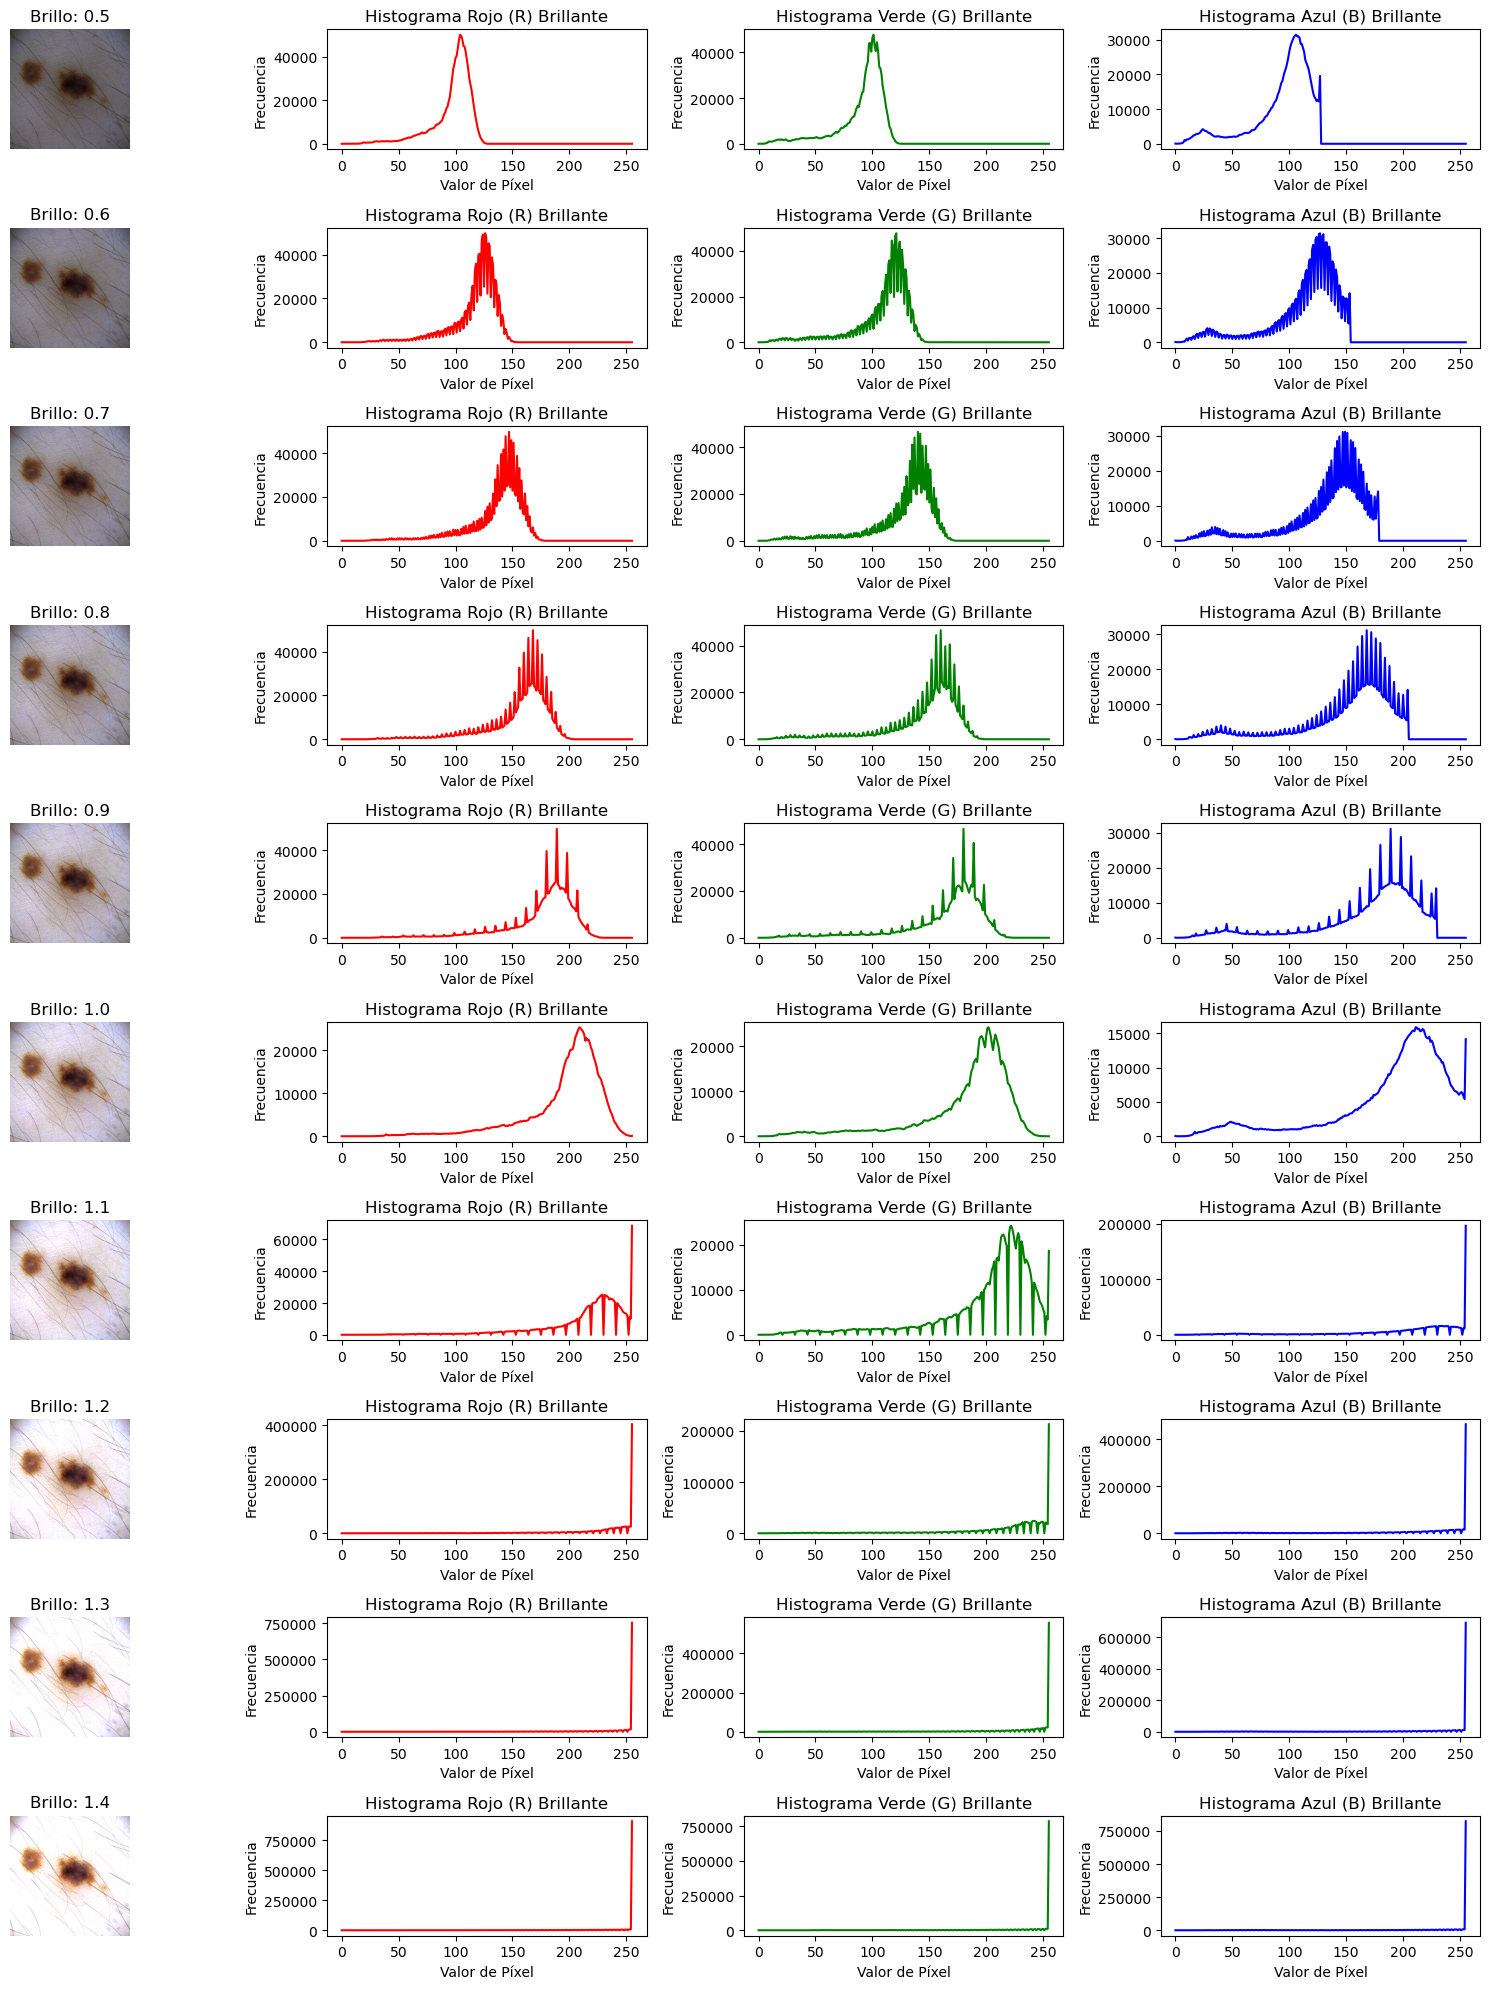

In [2]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Abrir una imagen
imagen_original = Image.open('imagen_ecualizada.jpg')

# Crear una figura con subtramas para mostrar las imágenes y los histogramas
fig, axs = plt.subplots(10, 4, figsize=(16, 20))

# Inicializar el factor de brillo
factor_brillo = 0.5

# Iterar sobre las filas (valores de brillo)
for i in range(10):
    # Aumentar el brillo con el factor actual
    enhancer = ImageEnhance.Brightness(imagen_original)
    imagen_brillante = enhancer.enhance(factor_brillo)
    
    # Calcular los histogramas RGB de la imagen brillante
    hist_r_brillante = imagen_brillante.histogram()[0:256]
    hist_g_brillante = imagen_brillante.histogram()[256:512]
    hist_b_brillante = imagen_brillante.histogram()[512:768]

    # Mostrar la imagen brillante en la subtrama correspondiente
    axs[i, 0].imshow(imagen_brillante)
    axs[i, 0].set_title(f'Brillo: {factor_brillo:.1f}')
    axs[i, 0].axis('off')

    # Mostrar el histograma del canal Rojo (R) para la imagen brillante
    axs[i, 1].plot(hist_r_brillante, color='red')
    axs[i, 1].set_title('Histograma Rojo (R) Brillante')
    axs[i, 1].set_xlabel('Valor de Píxel')
    axs[i, 1].set_ylabel('Frecuencia')

    # Mostrar el histograma del canal Verde (G) para la imagen brillante
    axs[i, 2].plot(hist_g_brillante, color='green')
    axs[i, 2].set_title('Histograma Verde (G) Brillante')
    axs[i, 2].set_xlabel('Valor de Píxel')
    axs[i, 2].set_ylabel('Frecuencia')

    # Mostrar el histograma del canal Azul (B) para la imagen brillante
    axs[i, 3].plot(hist_b_brillante, color='blue')
    axs[i, 3].set_title('Histograma Azul (B) Brillante')
    axs[i, 3].set_xlabel('Valor de Píxel')
    axs[i, 3].set_ylabel('Frecuencia')
    
    # Incrementar el factor de brillo para la próxima iteración
    factor_brillo += 0.1

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar la figura con las subtramas
plt.show()




# FILTRO SOBEL (DETECCIÓN DE BORDES)

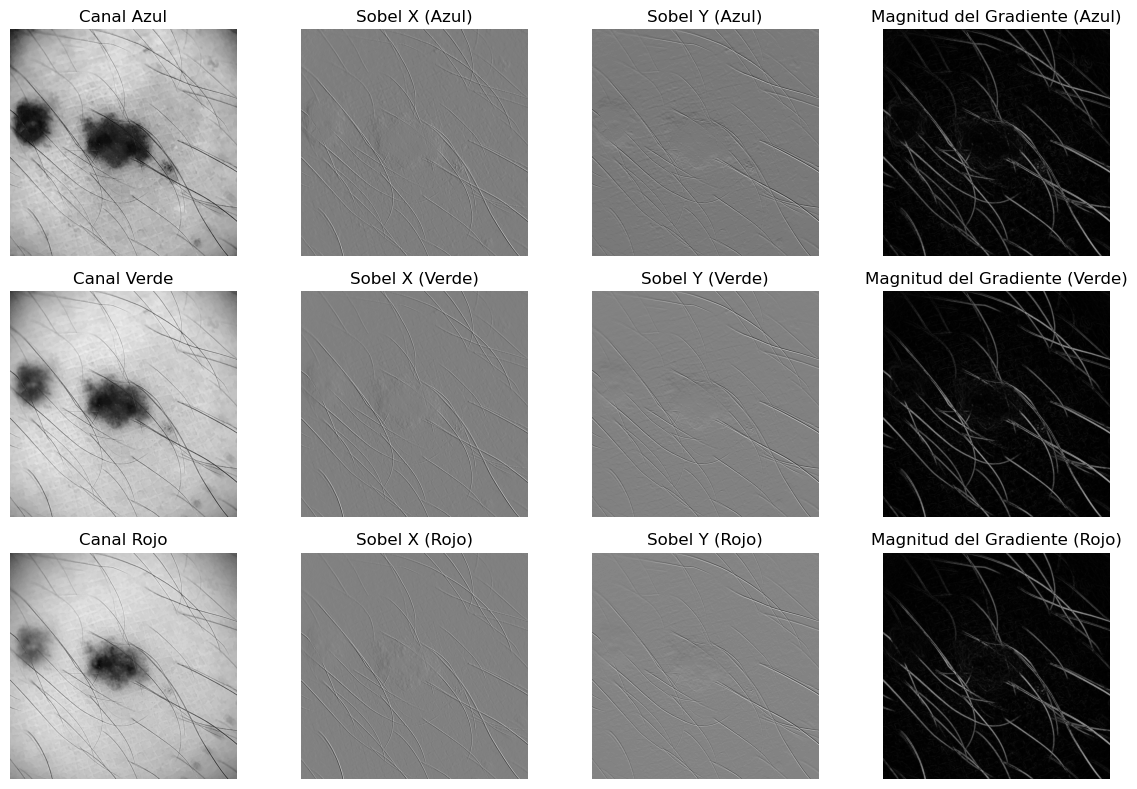

In [1]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen a color
imagen = cv2.imread('miche.jpg')

# Dividir la imagen en sus canales de color (BGR)
canal_azul, canal_verde, canal_rojo = cv2.split(imagen)

# Aplicar el filtro Sobel en cada canal
sobel_x_azul = cv2.Sobel(canal_azul, cv2.CV_64F, 1, 0, ksize=5)  # Gradiente horizontal en el canal azul
sobel_y_azul = cv2.Sobel(canal_azul, cv2.CV_64F, 0, 1, ksize=5)  # Gradiente vertical en el canal azul

sobel_x_verde = cv2.Sobel(canal_verde, cv2.CV_64F, 1, 0, ksize=5)  # Gradiente horizontal en el canal verde
sobel_y_verde = cv2.Sobel(canal_verde, cv2.CV_64F, 0, 1, ksize=5)  # Gradiente vertical en el canal verde

sobel_x_rojo = cv2.Sobel(canal_rojo, cv2.CV_64F, 1, 0, ksize=5)  # Gradiente horizontal en el canal rojo
sobel_y_rojo = cv2.Sobel(canal_rojo, cv2.CV_64F, 0, 1, ksize=5)  # Gradiente vertical en el canal rojo

# Calcular la magnitud del gradiente para cada canal
magnitud_gradiente_azul = cv2.magnitude(sobel_x_azul, sobel_y_azul)
magnitud_gradiente_verde = cv2.magnitude(sobel_x_verde, sobel_y_verde)
magnitud_gradiente_rojo = cv2.magnitude(sobel_x_rojo, sobel_y_rojo)

# Mostrar los resultados en una figura
plt.figure(figsize=(12, 8))

plt.subplot(3, 4, 1)
plt.imshow(canal_azul, cmap='gray')
plt.title('Canal Azul')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(sobel_x_azul, cmap='gray')
plt.title('Sobel X (Azul)')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(sobel_y_azul, cmap='gray')
plt.title('Sobel Y (Azul)')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(magnitud_gradiente_azul, cmap='gray')
plt.title('Magnitud del Gradiente (Azul)')
plt.axis('off')

plt.subplot(3, 4, 5)
plt.imshow(canal_verde, cmap='gray')
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(sobel_x_verde, cmap='gray')
plt.title('Sobel X (Verde)')
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(sobel_y_verde, cmap='gray')
plt.title('Sobel Y (Verde)')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(magnitud_gradiente_verde, cmap='gray')
plt.title('Magnitud del Gradiente (Verde)')
plt.axis('off')

plt.subplot(3, 4, 9)
plt.imshow(canal_rojo, cmap='gray')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(3, 4, 10)
plt.imshow(sobel_x_rojo, cmap='gray')
plt.title('Sobel X (Rojo)')
plt.axis('off')

plt.subplot(3, 4, 11)
plt.imshow(sobel_y_rojo, cmap='gray')
plt.title('Sobel Y (Rojo)')
plt.axis('off')

plt.subplot(3, 4, 12)
plt.imshow(magnitud_gradiente_rojo, cmap='gray')
plt.title('Magnitud del Gradiente (Rojo)')
plt.axis('off')

plt.tight_layout()
plt.show()

# FILTRO OTSU

In [ ]:
#filtro otso
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en formato RGB
imagen_rgb = cv2.imread('imagen_realzada.jpg')

# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2GRAY)

# Aplicar el filtro de Otsu para binarizar la imagen en escala de grises
_, imagen_binarizada = cv2.threshold(imagen_gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original en RGB, la imagen en escala de grises y la imagen binarizada
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imagen RGB Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagen_binarizada, cmap='gray')
plt.title('Imagen Binarizada (Otsu)')
plt.axis('off')

plt.tight_layout()
plt.show()
